# Evaluating ASL Recognition Models

## Evaluation Metrics

In [3]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt

# For confusion matrix calculation/visualization
import seaborn as sn
import pandas as pd
import csv

In [5]:
# Note no 'J' & 'Z' were used
letters = "ABCDEFGHIKLMNOPQRSTUVWXY"

### Accuracy

In [3]:
def calc_accuracy(matrix,categories=letters):
    # TP + TN / (all P & all N)
    true_pos = 0.0
    true_neg = 0.0
    all_pos_neg = matrix[:][:].sum()
    #
    acc_dict = {}
    
    for i,letter in enumerate(letters):
        true_pos_temp = matrix[i][i]
        true_neg_temp = matrix[:i][:i].sum() + matrix[:i][i+1:].sum() + matrix[i+1:][:i].sum() + matrix[i+1:][i+1:].sum()
        
        acc_dict[letter] = (true_pos_temp+true_neg_temp) / all_pos_neg
        #
        true_pos += true_pos_temp
        true_neg += true_neg_temp
        
    #
    acc_dict['all'] = (true_pos+true_neg) / 24 / 24
    return acc_dict

# calc_accuracy(resnet50_confusion_matrix)

### Precision

In [10]:
def calc_precision(matrix,categories=letters):
    # TP /(TP+FP)
    # TP + TN / (all P & all N)
    true_pos = 0.0
    # TN: matrix[not letter][not letter]
    all_pred = 0.0
    #
    prec_dict = {}
    
    for i,letter in enumerate(letters):
        true_pos_temp = matrix[i][i]
        all_pred_temp = sum(matrix[:][i])
        
        true_pos += true_pos_temp
        all_pred += all_pred_temp
        #
        prec_dict[letter] = true_pos_temp / all_pred_temp
    
    #
    prec_dict['all'] = true_pos/all_pred
#     prec_dict['avg'] = sum(prec_dict[l] for l in letters)/24
    return prec_dict

resnet50_cm_count = np.loadtxt('../confusion_matrices/confusionMatrix_resnet50_rgbModel_197px_batch512_epoch1024_counts.csv')

calc_precision(resnet50_cm_count)


{'A': 0.7431192660550459,
 'B': 0.9906367041198502,
 'C': 0.9259259259259259,
 'D': 0.7334558823529411,
 'E': 0.7996289424860853,
 'F': 0.8519924098671727,
 'G': 0.8230912476722533,
 'H': 0.250936329588015,
 'I': 0.7561904761904762,
 'K': 0.6502636203866432,
 'L': 0.933852140077821,
 'M': 0.5352380952380953,
 'N': 0.8716981132075472,
 'O': 0.5507518796992481,
 'P': 0.715370018975332,
 'Q': 0.2514177693761815,
 'R': 0.6494661921708185,
 'S': 0.6673003802281369,
 'T': 0.21468926553672316,
 'U': 0.947069943289225,
 'V': 0.9259962049335864,
 'W': 0.9512670565302144,
 'X': 0.3793103448275862,
 'Y': 0.7677543186180422,
 'all': 0.7030981067125646}

### Sensitivity

In [5]:
def calc_sensitivity_dic(matrix,categories=letters):
    # TP / (all P)
    # all predicted: matrix_dict[letter][*]
    # all positive: matrix_dict[*][letter]
    all_pos = 0.0
    # TP: matrix_dict[letter][letter]
    true_pos = 0.0
    
    sensitivity_dict = {}
    
    for letter in letters:
        true_pos = matrix[letter][letter]
        all_pos = sum(matrix[letter].values())
        #
        sensitivity_dict[letter] = true_pos/all_pos
        
    return sensitivity_dict

def calc_sensitivity(matrix,categories=letters):
    # TP / (all P)
    # all predicted: matrix_dict[letter][*]
    # all positive: matrix_dict[*][letter]
    all_pos = 0.0
    # TP: matrix_dict[letter][letter]
    true_pos = 0.0
    
    sensitivity_dict = {}
    
    for letter in range(len(letters)):
        true_pos = matrix[letter][letter]
        all_pos = sum(matrix[letter][:])
        #
        sensitivity_dict[letters[letter]] = true_pos/all_pos
        
    return sensitivity_dict


### Specificity 

In [6]:
def calc_specificity(matrix,categories=letters):
    # TN / (all N)
    # all predicted: matrix_dict[letter][*]
    # all positive: matrix_dict[*][letter]
    # all neg: matrix[letter][not letter]
    # TN: matrix_dict[not letter][not letter]
    
    specificity_dict = {}
    
    for letter in letters:
        not_letters = [l for l in letters if l != letter]
        all_neg = sum([matrix[letter][l] for l in letters])
        true_neg = sum([matrix[not_letter][letter] for not_letter in not_letters])
        specificity_dict[letter] = (true_neg/all_neg)
        
    return specificity_dict

# calc_specificity(confusion_matrix)

## Confusion Matrix of Test Data

After performing tests, a confusion matrix can be used to evaluate the model and it's accuracy for each ASL handshape/letter.

 We can compare the different models which achieved an accuracy between 60%-70%.

### Original Research Paper Confusion Matrix

<!-- Display research paper's confusion matrix image -->
<img src="images/confusion-matrix_spelling-it-out.png" width="600">

In [11]:
# confusion_matrix = np.zeros(len(letters),len(letters))

# Manually enter values for research paper
# rows == targets; cols == predictions
confusion_matrix = {target: {prediction:0.0 for prediction in letters} for target in letters}

# VALUE_A
confusion_matrix['A']['A'] = 0.75
confusion_matrix['A']['C'] = 0.05
confusion_matrix['A']['M'] = 0.05
confusion_matrix['A']['O'] = 0.05
confusion_matrix['A']['T'] = 0.10
# VALUE_B
confusion_matrix['B']['A'] = 0.03
confusion_matrix['B']['B'] = 0.83
confusion_matrix['B']['C'] = 0.03
confusion_matrix['B']['L'] = 0.03
confusion_matrix['B']['T'] = 0.07
# VALUE_C
confusion_matrix['C']['C'] = 0.57
confusion_matrix['C']['D'] = 0.13
confusion_matrix['C']['E'] = 0.03
confusion_matrix['C']['F'] = 0.03
confusion_matrix['C']['G'] = 0.03
confusion_matrix['C']['J'] = 0.07
confusion_matrix['C']['L'] = 0.03
confusion_matrix['C']['T'] = 0.03
confusion_matrix['C']['Y'] = 0.03
# VALUE_D
confusion_matrix['D']['D'] = 0.37
confusion_matrix['D']['F'] = 0.13
confusion_matrix['D']['G'] = 0.03
confusion_matrix['D']['I'] = 0.07
confusion_matrix['D']['K'] = 0.03
confusion_matrix['D']['L'] = 0.07
confusion_matrix['D']['R'] = 0.17
confusion_matrix['D']['S'] = 0.03
confusion_matrix['D']['X'] = 0.10
# VALUE_E
confusion_matrix['E']['B'] = 0.07
confusion_matrix['E']['C'] = 0.03
confusion_matrix['E']['E'] = 0.63
confusion_matrix['E']['N'] = 0.03
confusion_matrix['E']['O'] = 0.03
confusion_matrix['E']['R'] = 0.03
confusion_matrix['E']['S'] = 0.10
confusion_matrix['E']['T'] = 0.07
# VALUE_F
confusion_matrix['F']['B'] = 0.30
confusion_matrix['F']['C'] = 0.10
confusion_matrix['F']['E'] = 0.05
confusion_matrix['F']['F'] = 0.35
confusion_matrix['F']['L'] = 0.15
confusion_matrix['F']['S'] = 0.05
# VALUE_G
confusion_matrix['G']['A'] = 0.05
confusion_matrix['G']['E'] = 0.05
confusion_matrix['G']['F'] = 0.05
confusion_matrix['G']['G'] = 0.60
confusion_matrix['G']['P'] = 0.20
confusion_matrix['G']['T'] = 0.05
# VALUE_H
confusion_matrix['H']['G'] = 0.03
confusion_matrix['H']['H'] = 0.80
confusion_matrix['H']['K'] = 0.03
confusion_matrix['H']['N'] = 0.03
confusion_matrix['H']['P'] = 0.10
# VALUE_I
confusion_matrix['I']['B'] = 0.03
confusion_matrix['I']['C'] = 0.03
confusion_matrix['I']['D'] = 0.03
confusion_matrix['I']['F'] = 0.03
confusion_matrix['I']['I'] = 0.73
confusion_matrix['I']['N'] = 0.03
confusion_matrix['I']['T'] = 0.03
confusion_matrix['I']['X'] = 0.03
# VALUE_K
confusion_matrix['K']['C'] = 0.03
confusion_matrix['K']['D'] = 0.03
confusion_matrix['K']['F'] = 0.07
confusion_matrix['K']['G'] = 0.03
confusion_matrix['K']['K'] = 0.43
confusion_matrix['K']['L'] = 0.03
confusion_matrix['K']['N'] = 0.03
confusion_matrix['K']['R'] = 0.07
confusion_matrix['K']['V'] = 0.20
confusion_matrix['K']['X'] = 0.03
confusion_matrix['K']['Y'] = 0.03
# VALUE_L
confusion_matrix['L']['D'] = 0.13
confusion_matrix['L']['L'] = 0.87
# VALUE_M
confusion_matrix['M']['A'] = 0.10
confusion_matrix['M']['C'] = 0.03
confusion_matrix['M']['E'] = 0.10
confusion_matrix['M']['G'] = 0.03
confusion_matrix['M']['L'] = 0.03
confusion_matrix['M']['M'] = 0.17
confusion_matrix['M']['N'] = 0.10
confusion_matrix['M']['P'] = 0.03
confusion_matrix['M']['Q'] = 0.03
confusion_matrix['M']['S'] = 0.27
confusion_matrix['M']['X'] = 0.07
# VALUE_N
confusion_matrix['N']['A'] = 0.17
confusion_matrix['N']['B'] = 0.10
confusion_matrix['N']['D'] = 0.03
confusion_matrix['N']['I'] = 0.03
confusion_matrix['N']['M'] = 0.10
confusion_matrix['N']['N'] = 0.23
confusion_matrix['N']['O'] = 0.07
confusion_matrix['N']['S'] = 0.13
confusion_matrix['N']['T'] = 0.10
confusion_matrix['N']['V'] = 0.03
# VALUE_O
confusion_matrix['O']['A'] = 0.10
confusion_matrix['O']['B'] = 0.30
confusion_matrix['O']['D'] = 0.13
confusion_matrix['O']['F'] = 0.03
confusion_matrix['O']['G'] = 0.07
confusion_matrix['O']['I'] = 0.03
confusion_matrix['O']['K'] = 0.07
confusion_matrix['O']['L'] = 0.03
confusion_matrix['O']['O'] = 0.13
confusion_matrix['O']['P'] = 0.07
confusion_matrix['O']['S'] = 0.03
# VALUE_P
confusion_matrix['P']['C'] = 0.07
confusion_matrix['P']['D'] = 0.10
confusion_matrix['P']['F'] = 0.03
confusion_matrix['P']['H'] = 0.10
confusion_matrix['P']['I'] = 0.03
confusion_matrix['P']['P'] = 0.57
confusion_matrix['P']['Q'] = 0.07
confusion_matrix['P']['T'] = 0.03
# VALUE_Q
confusion_matrix['Q']['A'] = 0.03
confusion_matrix['Q']['G'] = 0.07
confusion_matrix['Q']['P'] = 0.07
confusion_matrix['Q']['Q'] = 0.77
confusion_matrix['Q']['T'] = 0.03
confusion_matrix['Q']['X'] = 0.03
# VALUE_R
confusion_matrix['R']['C'] = 0.03
confusion_matrix['R']['D'] = 0.03
confusion_matrix['R']['E'] = 0.03
confusion_matrix['R']['F'] = 0.07
confusion_matrix['R']['I'] = 0.03
confusion_matrix['R']['R'] = 0.63
confusion_matrix['R']['U'] = 0.13
confusion_matrix['R']['V'] = 0.03
# VALUE_S
confusion_matrix['S']['A'] = 0.30
confusion_matrix['S']['C'] = 0.13
confusion_matrix['S']['D'] = 0.03
confusion_matrix['S']['E'] = 0.07
confusion_matrix['S']['I'] = 0.13
confusion_matrix['S']['N'] = 0.03
confusion_matrix['S']['O'] = 0.03
confusion_matrix['S']['S'] = 0.17
confusion_matrix['S']['T'] = 0.07
confusion_matrix['S']['X'] = 0.03
# VALUE_T
confusion_matrix['T']['A'] = 0.33
confusion_matrix['T']['E'] = 0.13
confusion_matrix['T']['H'] = 0.03
confusion_matrix['T']['I'] = 0.03
confusion_matrix['T']['M'] = 0.07
confusion_matrix['T']['N'] = 0.03
confusion_matrix['T']['O'] = 0.10
confusion_matrix['T']['S'] = 0.20
confusion_matrix['T']['T'] = 0.07
# VALUE_U
confusion_matrix['U']['B'] = 0.17
confusion_matrix['U']['E'] = 0.03
confusion_matrix['U']['R'] = 0.10
confusion_matrix['U']['U'] = 0.67
confusion_matrix['U']['W'] = 0.03
# VALUE_V
confusion_matrix['V']['C'] = 0.03
confusion_matrix['V']['L'] = 0.03
confusion_matrix['V']['R'] = 0.03
confusion_matrix['V']['U'] = 0.03
confusion_matrix['V']['V'] = 0.87
# VALUE_W
confusion_matrix['W']['C'] = 0.03
confusion_matrix['W']['F'] = 0.03
confusion_matrix['W']['O'] = 0.03
confusion_matrix['W']['V'] = 0.37
confusion_matrix['W']['W'] = 0.53
# VALUE_X
confusion_matrix['X']['A'] = 0.03
confusion_matrix['X']['B'] = 0.03
confusion_matrix['X']['D'] = 0.17
confusion_matrix['X']['F'] = 0.07
confusion_matrix['X']['G'] = 0.07
confusion_matrix['X']['I'] = 0.20
confusion_matrix['X']['K'] = 0.03
confusion_matrix['X']['N'] = 0.07
confusion_matrix['X']['R'] = 0.10
confusion_matrix['X']['X'] = 0.20
confusion_matrix['X']['Y'] = 0.03
# VAUE_Y
confusion_matrix['Y']['A'] = 0.07
confusion_matrix['Y']['F'] = 0.07
confusion_matrix['Y']['I'] = 0.10
confusion_matrix['Y']['Y'] = 0.77

for t in letters:
    print(t,sum(confusion_matrix[t].values()))

A 1.0000000000000002
B 0.99
C 0.9500000000000002
D 1.0000000000000002
E 0.99
F 1.0
G 1.0
H 0.9900000000000001
I 0.9400000000000001
K 0.98
L 1.0
M 0.9600000000000002
N 0.99
O 0.9900000000000002
P 1.0
Q 1.0
R 0.9800000000000001
S 0.9900000000000002
T 0.9900000000000002
U 1.0
V 0.99
W 0.99
X 1.0000000000000002
Y 1.01


In [8]:
# Write the values from the paper's confusion matrix as CSV
with open('../confusion_matrices/confusionMatrix_paper.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(confusion_matrix.keys())
    for k in letters:
        writer.writerow([confusion_matrix[k][l] for l in letters])

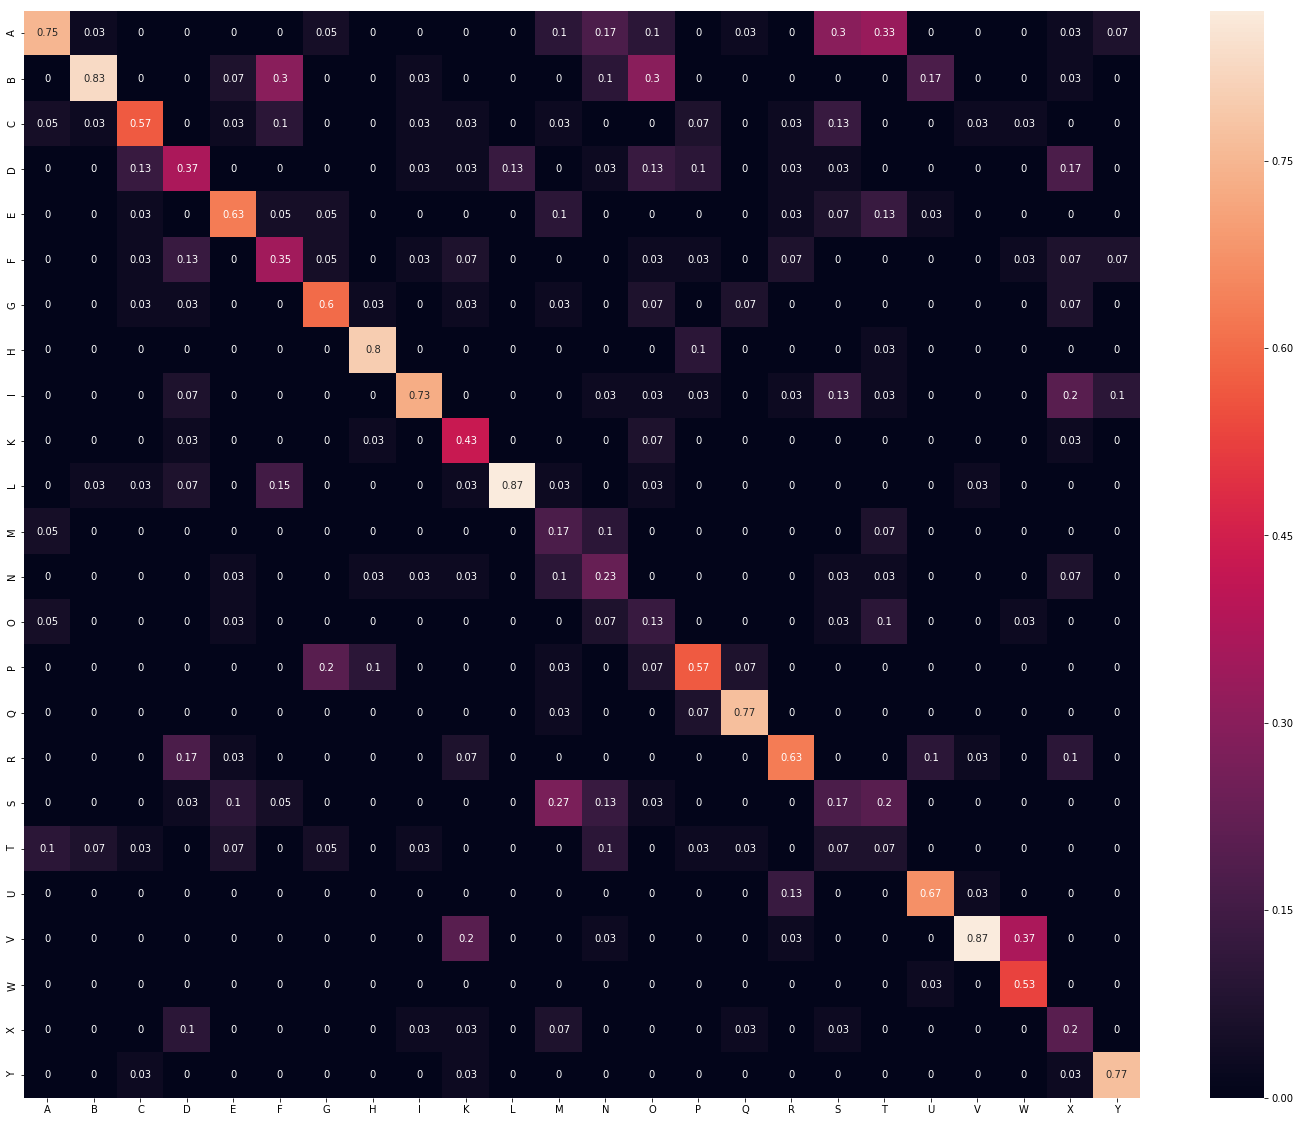

In [38]:
df_cm = pd.DataFrame(confusion_matrix, index = [i for i in letters],
                  columns = [i for i in letters])
plt.figure(figsize = (25,20))
sn.heatmap(df_cm, annot=True)

### VGG16 Evaluation

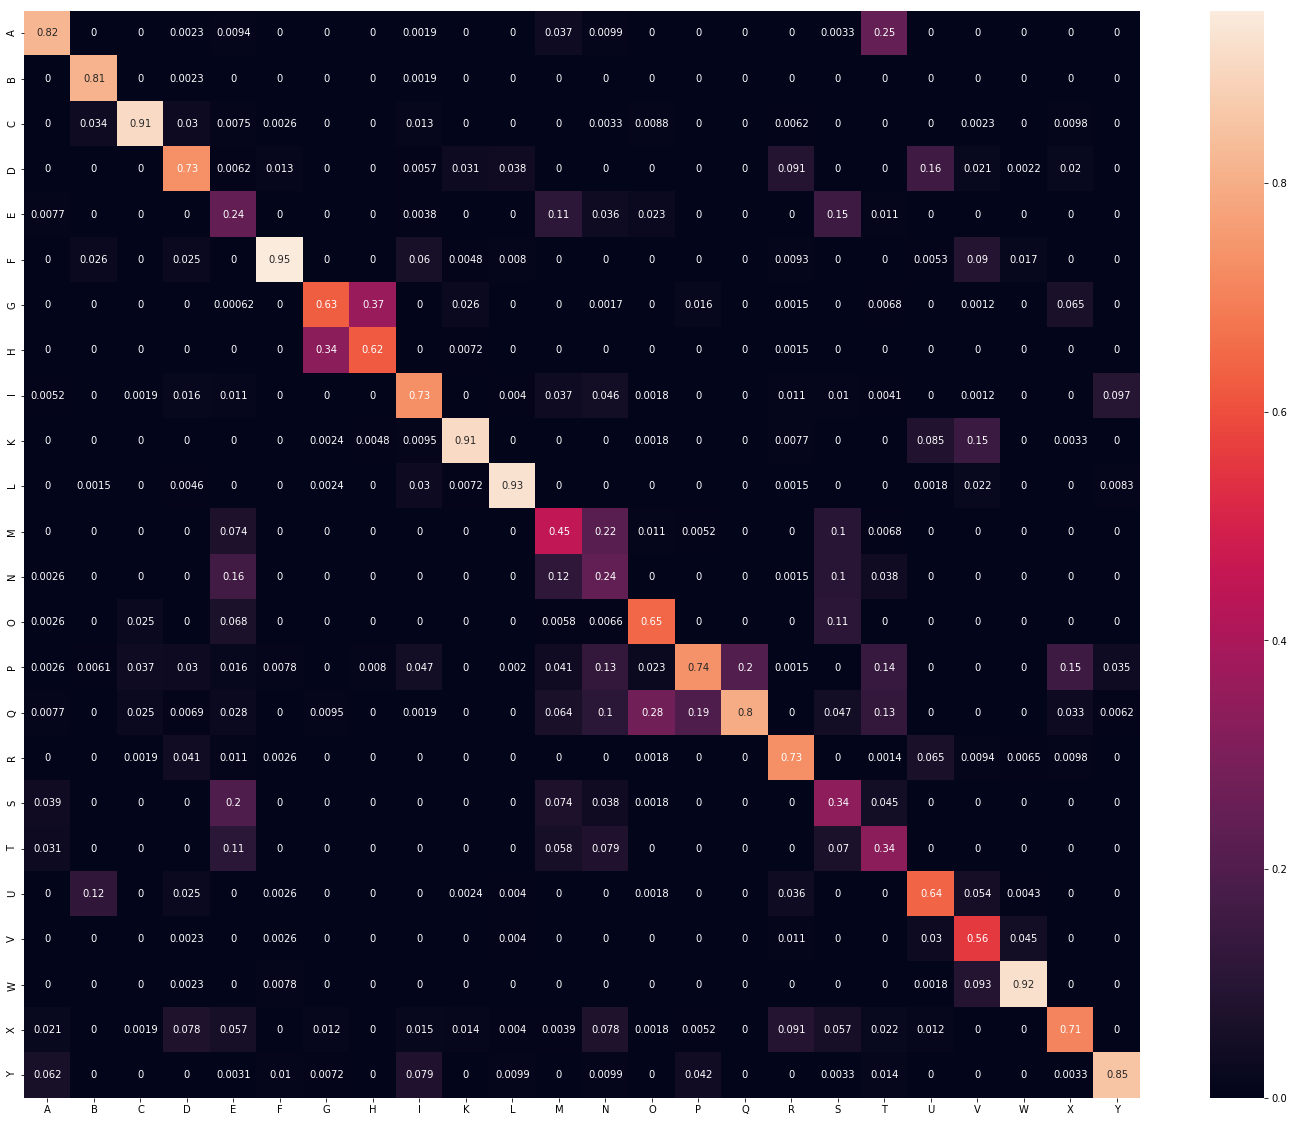

In [6]:
# Load model weights
vgg16_confusion_matrix = np.loadtxt('../confusion_matrices/confusionMatrix_vgg16_rgbModel_100px.best_batch500_epoch150_percent.csv')

# Display percentages for confusion matrix
df_cm_vgg16 = pd.DataFrame(vgg16_confusion_matrix, index = [i for i in letters],
                  columns = [i for i in letters])
plt.figure(figsize = (25,20))
sn.heatmap(df_cm_vgg16, annot=True)

### VGG19 120px-by-120px Evaluation

In [11]:
# Load model weights
# Use test data to make predictions (for evaluation)

# Change one-hot encoding to just an integer representing letter (match research paper)
# Get percents to compare with research paper benchmark

# Print out counts to see distribution of the number of letters tested against

# Display percentages for confusion matrix

### VGG16 160px-by-160px Evaluation

### ResNet50 Evaluation

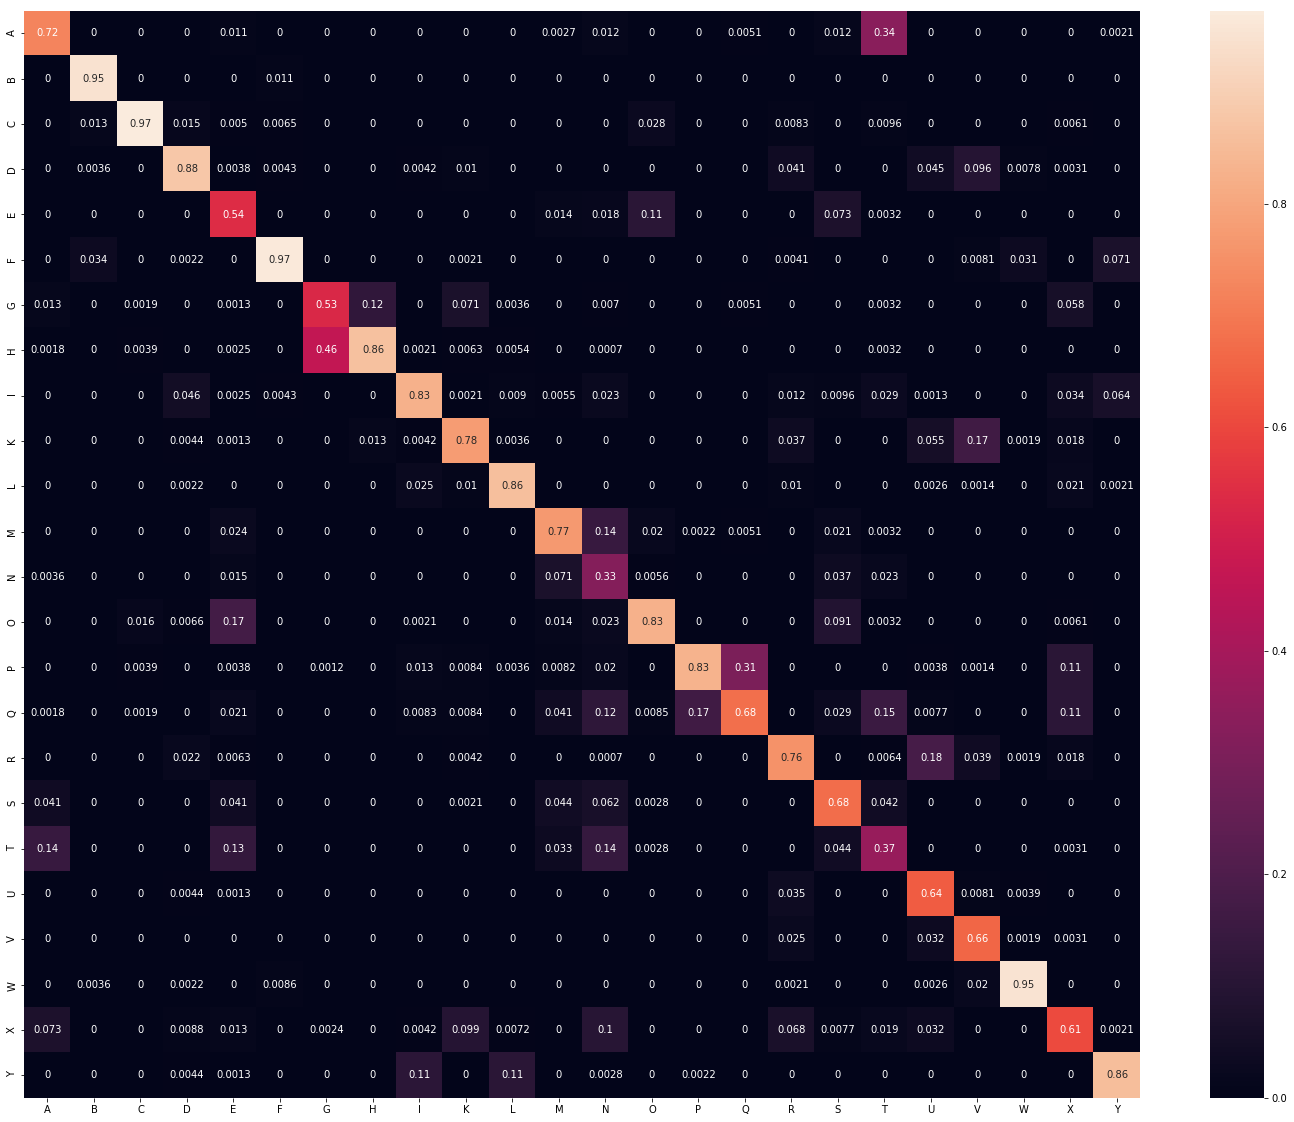

In [8]:
# Load in as numpy array (Note percents add to 1 along column)
resnet50_confusion_matrix = np.loadtxt('../confusion_matrices/confusionMatrix_resnet50_rgbModel_197px_batch512_epoch1024_percent.csv')

# Display percentages for confusion matrix
df_cm_resnet50 = pd.DataFrame(resnet50_confusion_matrix, index = [i for i in letters],
                  columns = [i for i in letters])
plt.figure(figsize = (25,20))
sn.heatmap(df_cm_resnet50, annot=True)

In [15]:
true_neg = 0.0
for nl,not_letter in enumerate(letters):
    if nl == 0:
        continue
    true_neg += resnet50_confusion_matrix[nl][1:].sum()
print(true_neg)

22.617580060297037


In [16]:
y=(calc_sensitivity(resnet50_confusion_matrix))
x=(calc_sensitivity_dic(confusion_matrix))

for l in letters:
    a = "{}: {:5.1f}% ({:.1f},{:.1f})".format(l,(y[l]*100-x[l]*100),x[l]*100,y[l]*100)
    print(a)

A:  -9.6% (75.0,65.4)
B:  15.0% (83.8,98.9)
C:  31.4% (60.0,91.4)
D:  43.1% (37.0,80.1)
E:   7.8% (63.6,71.5)
F:  51.4% (35.0,86.4)
G:   5.0% (60.0,65.0)
H: -17.0% (80.8,63.8)
I:  -0.4% (77.7,77.3)
K:  28.0% (43.9,71.9)
L:   4.9% (87.0,91.9)
M:  60.1% (17.7,77.8)
N:  44.6% (23.2,67.8)
O:  58.0% (13.1,71.1)
P:   6.2% (57.0,63.2)
Q: -27.0% (77.0,50.0)
R:   8.7% (64.3,73.0)
S:  57.1% (17.2,74.2)
T:  35.5% (7.1,42.6)
U:  25.4% (67.0,92.4)
V:   3.6% (87.9,91.4)
W:  42.5% (53.5,96.0)
X:  38.0% (20.0,58.0)
Y:   2.7% (76.2,79.0)


In [17]:
calc_sensitivity(resnet50_confusion_matrix)

{'A': 0.6541171294162466,
 'B': 0.9887651740493609,
 'C': 0.9138943360729519,
 'D': 0.8006760769058534,
 'E': 0.7148347127951281,
 'F': 0.863562362245267,
 'G': 0.6498339462553268,
 'H': 0.6380810183154159,
 'I': 0.7727489518723214,
 'K': 0.7185537828880006,
 'L': 0.919314513458699,
 'M': 0.7780568865469321,
 'N': 0.6783237219600163,
 'O': 0.7111333858036111,
 'P': 0.632082096395638,
 'Q': 0.5003125649967907,
 'R': 0.7303152279326937,
 'S': 0.7422325609072771,
 'T': 0.42554209803989684,
 'U': 0.9235705436689464,
 'V': 0.9144985391022437,
 'W': 0.9603193692636763,
 'X': 0.5800432342726068,
 'Y': 0.7896662982051981}

In [36]:
# Compare resnet & benchmark letter per letter
print('Benchmark vs ResNet-50\n')
for l_target in range(len(letters)):
    resnet_acc = resnet50_confusion_matrix[l_target][l_target]
    bench_acc = confusion_matrix[letters[l_target]][letters[l_target]]
    if(bench_acc >= resnet_acc):
        print(f'"{letters[l_target]}" Diff {bench_acc-resnet_acc:.2f} -> [{bench_acc},{resnet_acc:.2f}]')

Benchmark vs ResNet-50

"A" Diff 0.03 -> [0.75,0.72]
"E" Diff 0.09 -> [0.63,0.54]
"G" Diff 0.07 -> [0.6,0.53]
"L" Diff 0.01 -> [0.87,0.86]
"Q" Diff 0.09 -> [0.77,0.68]
"U" Diff 0.03 -> [0.67,0.64]
"V" Diff 0.21 -> [0.87,0.66]


In [37]:
# Compare resnet & benchmark letter per letter
print('Benchmark vs ResNet-50\n')
for l_target in range(len(letters)):
    resnet_acc = resnet50_confusion_matrix[l_target][l_target]
    bench_acc = confusion_matrix[letters[l_target]][letters[l_target]]
    if(bench_acc <= resnet_acc):
        print(f'"{letters[l_target]}" Diff {bench_acc-resnet_acc:.2f} -> [{bench_acc},{resnet_acc:.2f}]')

Benchmark vs ResNet-50

"B" Diff -0.12 -> [0.83,0.95]
"C" Diff -0.40 -> [0.57,0.97]
"D" Diff -0.51 -> [0.37,0.88]
"F" Diff -0.62 -> [0.35,0.97]
"H" Diff -0.06 -> [0.8,0.86]
"I" Diff -0.10 -> [0.73,0.83]
"K" Diff -0.35 -> [0.43,0.78]
"M" Diff -0.60 -> [0.17,0.77]
"N" Diff -0.10 -> [0.23,0.33]
"O" Diff -0.70 -> [0.13,0.83]
"P" Diff -0.26 -> [0.57,0.83]
"R" Diff -0.13 -> [0.63,0.76]
"S" Diff -0.51 -> [0.17,0.68]
"T" Diff -0.30 -> [0.07,0.37]
"W" Diff -0.42 -> [0.53,0.95]
"X" Diff -0.41 -> [0.2,0.61]
"Y" Diff -0.09 -> [0.77,0.86]
